In [1]:
# import io
# import os
# import glob
# import imageio
# import pandas as pd
import numpy as np
import pathlib as pl
from tqdm import tqdm
import imgaug.augmenters as iaa
# from moviepy.editor import *
import matplotlib.pyplot as plt
# from IPython.display import Image
# from collections import defaultdict

In [2]:
def select_train_test_path(base_path, select_folder,select_train_test):
    """
    Selects the correct folder path based on the given parameters.
    """
    folder_name = '01 - Original' if select_folder == 1 else '02 - Denoised'
    train_test_folder = 'train' if select_train_test == 1 else 'test'
    return base_path.joinpath('img', folder_name, train_test_folder)

In [3]:
def sorting_key(filepath):
    """
    Sorting function for file paths based on patient number and slice number.
    """
    parts = filepath.stem.split('_')
    patient_number, slice_number = int(parts[1]), int(parts[2])
    return (patient_number, slice_number)

In [6]:
def create_output_directories(base_path, select_folder,select_train_test):
        """
        Creates necessary output directories.
        """
        folder_name = '01 - Original' if select_folder == 1 else '02 - Denoised'
        train_test_folder = 'train' if select_train_test == 1 else 'test'
        output_folder1 = base_path.joinpath('img', '03 - Augmented')
        output_folder1.mkdir(parents=True, exist_ok=True)
        output_folder2 = base_path.joinpath('img', folder_name)
        output_folder2.mkdir(parents=True, exist_ok=True)

        folders_to_create = [('ims'),('mask')]
        list_of_folders = []
        
        for main_folder in folders_to_create:
                folder_path = base_path.joinpath('img', folder_name,train_test_folder, main_folder)
                folder_path.mkdir(parents=True, exist_ok=True)
                list_of_folders.append(folder_path)
        list_of_folders.append(output_folder1)
        list_of_folders.append(output_folder2)
        return list_of_folders

In [8]:
current_path        = pl.Path.cwd().parent
folder_images       = 2 # 1: original, 2: denoised
select_train_test   = 1 # 1: train, 2: test
folder_path         = select_train_test_path(current_path, folder_images, select_train_test)
images_path         = folder_path.joinpath('ims')
mask_path           = folder_path.joinpath('masks')
images_list         = list(images_path.glob('*.npy'))
mask_list           = list(mask_path.glob('*.npy'))
images_list.sort(key=sorting_key)
mask_list.sort(key=sorting_key)
output_folders      = create_output_directories(current_path, folder_images, select_train_test)

output_folders

[WindowsPath('d:/Trabajo de Maestria/segmentacion_maestria/img/02 - Denoised/train/ims'),
 WindowsPath('d:/Trabajo de Maestria/segmentacion_maestria/img/02 - Denoised/train/mask'),
 WindowsPath('d:/Trabajo de Maestria/segmentacion_maestria/img/03 - Augmented'),
 WindowsPath('d:/Trabajo de Maestria/segmentacion_maestria/img/02 - Denoised')]

In [9]:
images_list[0]

WindowsPath('d:/Trabajo de Maestria/segmentacion_maestria/img/02 - Denoised/train/ims/train_000_0.npy')

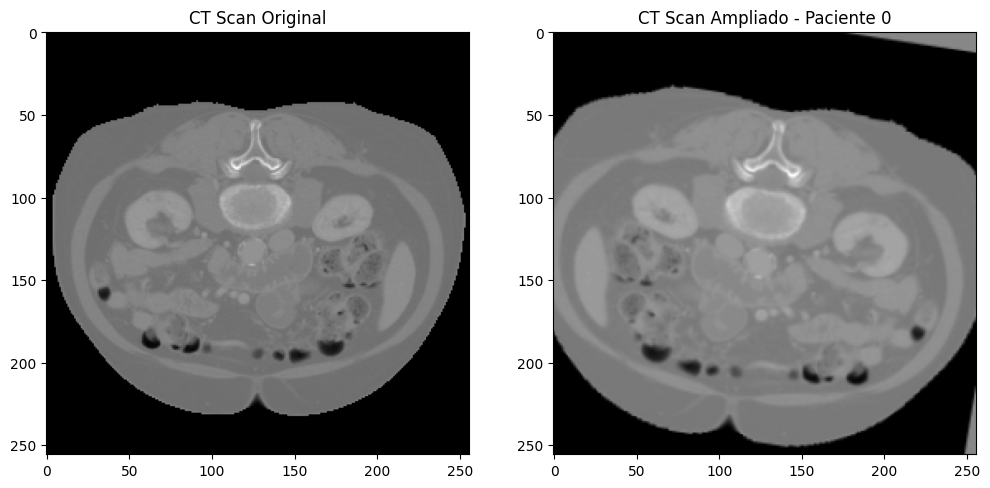

In [12]:
ct_scan = np.load(images_list[0])

# Definir una secuencia de ampliación de datos
augmenter = iaa.Sequential([
    iaa.Affine(rotate=(-10, 10)),   # Rotar la imagen
    iaa.Fliplr(0.5),               # Volteos horizontales
    iaa.Crop(percent=(0, 0.1))     # Recortar imágenes
])

# Aplicar la ampliación
augmented_ct_scan = augmenter(images=ct_scan)

# Mostrar la imagen original y la ampliada
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(ct_scan, cmap='gray')
ax[0].set_title('CT Scan Original')
ax[1].imshow(augmented_ct_scan, cmap='gray')
ax[1].set_title('CT Scan Ampliado - Paciente 0')
plt.savefig('train_000_0_augmented.png')
plt.show()


In [ ]:
import imgaug.augmenters as iaa
import numpy as np
import os

def apply_data_augmentation(images_list, output_folder="augmented_images"):
    # Crear el directorio de salida si no existe
    os.makedirs(output_folder, exist_ok=True)

    for i, image_path in enumerate(images_list):
        # Cargar la imagen de tomografía actual
        ct_scan = np.load(image_path)

        # Definir una secuencia de transformaciones para la ampliación de datos
        augmenter = iaa.Sequential([
            iaa.Affine(rotate=(-10, 10)),   # Rotación de la imagen
            iaa.Fliplr(0.5),                # Volteos horizontales
            iaa.Crop(percent=(0, 0.1))      # Recortar imágenes
        ])

        # Aplicar la ampliación de datos a la imagen de tomografía actual
        augmented_ct_scan = augmenter(images=ct_scan)

        # Guardar la imagen ampliada en formato .npy
        output_path = os.path.join(output_folder, f'train_{str(i).zfill(3)}_augmented.npy')
        np.save(output_path, augmented_ct_scan)

        # Mostrar la imagen original y la imagen ampliada
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].imshow(ct_scan, cmap='gray')
        ax[0].set_title(f'CT Scan Original - Paciente {i}')
        ax[1].imshow(augmented_ct_scan, cmap='gray')
        ax[1].set_title(f'CT Scan Ampliado - Paciente {i}')
        plt.savefig(f'train_{str(i).zfill(3)}_augmented.png')
        plt.show()

In [ ]:

# Ejemplo de uso
images_list = ["path/to/image1.npy", "path/to/image2.npy", "path/to/image3.npy"]
apply_data_augmentation(images_list)


In [ ]:
def sorting_key(filepath):
    parts           = filepath.stem.split('_')  # Divide el nombre del archivo en partes
    patient_number  = int(parts[1])  # Extrae el número del paciente
    slice_number    = int(parts[2])  # Extrae el número del slice
    return (patient_number, slice_number)  # Retorna una tupla con ambos números

# Ordena images_list basado en el número del paciente y el número del slice
images_list.sort(key=sorting_key)
mask_list.sort(key=sorting_key)

In [ ]:
def remove_noise(m_percentage, files,value,select_folder,select_item):
    new_folder=current_path.joinpath('Denoise').mkdir(exist_ok=True)
    noise_folder=current_path.joinpath('Denoise')
    new_folder=noise_folder.joinpath('train_noise').mkdir(exist_ok=True)
    new_folder=noise_folder.joinpath('test_noise').mkdir(exist_ok=True)
    
    folder_path     = current_path.joinpath('train' if select_folder == 1 else 'test')
    new_folder_path = noise_folder.joinpath('train_noise' if select_folder == 1 else 'test_noise')
    
    for file in tqdm(files, desc='Denoising images and masks'):
        name = file.stem
        image = np.load(file)
        height_to_remove = int(image.shape[0] * (m_percentage / 100))
        
        # Create a mask for the top area of the image
        mask = np.ones_like(image)
        mask[:height_to_remove] = 0

        # Apply the mask to the image
        image_masked = image.copy()
        image_masked[mask == 0] = value

        new_folder=new_folder_path.joinpath('ims').mkdir(exist_ok=True)
        new_folder=new_folder_path.joinpath('masks').mkdir(exist_ok=True)

        output_path = new_folder_path.joinpath('ims' if select_item == 1 else 'masks').joinpath(name + '.npy')
        np.save(output_path, image_masked)


# TRAIN

In [ ]:
remove_noise(8.5, images_list,-1024,1,1)    # Train , ims

In [ ]:
remove_noise(8.5, mask_list,-1024,1,2)      # Train , masks


# TEST

In [ ]:
remove_noise(8.5, images_list,-1024,2,1)    # Train , ims

In [ ]:
remove_noise(8.5, mask_list,-1024,2,2) 

In [ ]:
print(images_list[0])
print(mask_list[0])
print(images_list[0].stem)

In [ ]:
print(f"The unique values of the mask is: {np.unique(mask_data)}")
print(f"The unique values of the image is: {np.unique(image_data)}")

In [ ]:
np.unique(image_data)

In [ ]:
def generar_imagenes_png(images_list, mask_list, cmap='gray'):
    """
    Display images and masks side by side.
    
    Parameters:
    - images_list: List of paths to image files.
    - mask_list: List of paths to mask files.
    - cmap: Color map for displaying images and masks. Default is 'gray'.
    
    Returns:
    - None
    """

    for image, mask in tqdm(zip(images_list, mask_list), desc='Displaying images and masks'):
        parts = image.stem.split('_')
        set_folder = parts[0]
        pacient = int(parts[1])
        slice_number = int(parts[2])
        # Cargar datos de imagen y máscara
        image_data = np.load(image)
        mask_data = np.load(mask)
        
        # Crear subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        
        # Mostrar imagen
        ax1.imshow(image_data, cmap=cmap)
        ax1.set_title(f'Imagen: {image.stem}')
        ax1.axis('off')
        
        # Mostrar máscara
        ax2.imshow(mask_data, cmap=cmap)
        ax2.set_title(f'Máscara: {mask.stem}')
        ax2.axis('off')
        
        # Añadir un súper título con la información del paciente
        fig.suptitle(f'Paciente: {pacient}', fontsize=16)
        
        plt.savefig(f'{image.stem}.png')
        plt.close()

In [ ]:
generar_imagenes_png(images_list[:2], mask_list[:2], cmap='gray')

In [ ]:
def display_images_and_masks(images_list, mask_list, num_slices, counter, pacient, cmap='gray'):
    """
    Display images and masks side by side and store them in a list.
    
    Parameters:
    - images_list: List of paths to image files.
    - mask_list: List of paths to mask files.
    - num_slices: Number of image-mask pairs to display.
    - cmap: Color map for displaying images and masks. Default is 'gray'.
    
    Returns:
    - images_for_gif: List of images for creating a GIF.
    """
    num_slices = num_slices + counter
    
    # Limitar el número de imágenes y máscaras a mostrar
    images_list = images_list[counter:num_slices]
    mask_list = mask_list[counter:num_slices]
    
    # Asegurarse de que hay el mismo número de imágenes y máscaras
    assert len(images_list) == len(mask_list), "La cantidad de imágenes y máscaras debe ser la misma."
    
    images_for_gif = []  # Lista para almacenar imágenes para el GIF
    
    for image, mask in tqdm(zip(images_list, mask_list), desc='Displaying images and masks'):
        # Cargar datos de imagen y máscara
        image_data = np.load(image)
        mask_data = np.load(mask)
        
        # Crear subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        
        # Mostrar imagen
        ax1.imshow(image_data, cmap=cmap)
        ax1.set_title(f'Imagen: {image.stem}')
        ax1.axis('off')
        
        # Mostrar máscara
        ax2.imshow(mask_data, cmap=cmap)
        ax2.set_title(f'Máscara: {mask.stem}')
        ax2.axis('off')
        
        # Añadir un súper título con la información del paciente
        fig.suptitle(f'Paciente: {pacient:03d}', fontsize=16)
        
        # Guardar la figura en un buffer y luego agregarla a images_for_gif
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        images_for_gif.append(imageio.imread(buf))
        buf.close()
        
        # Cerrar la figura para evitar la visualización
        plt.close(fig)
    
    return images_for_gif

In [ ]:
def get_max_slices(images_list):
    slices_per_patient = defaultdict(int)

    for image_path in images_list:
        parts = image_path.stem.split('_')
        patient_number = int(parts[1])
        slice_number = int(parts[2])+1

        # Actualizar el conteo de slices si el número de slice actual es mayor que el máximo registrado
        slices_per_patient[patient_number] = max(slices_per_patient[patient_number], slice_number)

    return slices_per_patient

def print_max_slices(max_slices_per_patient):
    for patient_number, slice_count in max_slices_per_patient.items():
        print(f"Paciente {str(patient_number).zfill(3)}: {slice_count} slices")

# Llamar a la función y obtener el número máximo de slices por paciente
max_slices_per_patient = get_max_slices(images_list)

# Llamar a la función print_max_slices para imprimir la salida formateada
print_max_slices(max_slices_per_patient)

In [ ]:
def create_dataframe(max_slices_per_patient):
    # Convertir el diccionario a una lista de tuples
    data_list = [(str(patient_number).zfill(3), slice_count) for patient_number, slice_count in max_slices_per_patient.items()]
    
    # Crear un DataFrame y retornarlo
    return pd.DataFrame(data_list, columns=['Paciente', 'max_slices'])

df = create_dataframe(max_slices_per_patient)

df['max_slices'].describe()

In [ ]:
df

In [ ]:
counter = 0
for patient_number, max_slices in tqdm(max_slices_per_patient.items(), desc='Processing patients'):
    #print(f'Paciente {patient_number:03d}: {max_slices} slices')
    images_for_gif = display_images_and_masks(images_list, mask_list, max_slices, counter,patient_number,cmap='gray')
    counter = counter + max_slices + 1
    if images_for_gif:
        imageio.mimsave(f'paciente_{patient_number:03d}.gif', images_for_gif, duration=0.5)
    else:
        print(f'No se generaron imágenes para el paciente {patient_number:03d}')


In [ ]:
gif_list = list(current_path.glob('*.gif'))
for gif in gif_list:
    display(Image(str(gif)))

In [ ]:
def convert_gif_to_mp4(gif_path, mp4_path):
    clip = VideoFileClip(str(gif_path))
    clip.write_videofile(str(mp4_path), codec='libx264')

# Obtener la ruta del directorio actual
current_path = pl.Path.cwd()

# Lista de archivos GIF en el directorio actual
gif_list = list(current_path.glob('*.gif'))

# Ruta de directorio donde se guardarán los archivos MP4
mp4_directory = current_path / "mp4"

# Crear el directorio mp4 si no existe
mp4_directory.mkdir(exist_ok=True)

# Convertir cada archivo GIF a MP4
for gif_path in gif_list:
    mp4_filename = f"{gif_path.stem}.mp4"
    mp4_path = mp4_directory / mp4_filename
    convert_gif_to_mp4(gif_path, mp4_path)